In [96]:
# imports
import os
import time
import random
import numpy as np
import pickle
import statistics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import json
from math import pi
  

In [27]:
## get inputs
def get_case_inputs(case):
    scenario_path = os.path.join("Validation", case)

    with open(os.path.join(scenario_path, "factsheet.txt")) as file:
        factsheet = json.load(file)
        
    with open(os.path.join(scenario_path, "model.sav"),'rb') as file:
        model = pickle.load(file)

    with open(os.path.join(scenario_path, "X_test.pkl"),'rb') as file:
        X_test = pickle.load(file)

    with open(os.path.join(scenario_path, "X_train.pkl"),'rb') as file:
        X_train = pickle.load(file)

    with open(os.path.join(scenario_path, "y_test.pkl"),'rb') as file:
        y_test = pickle.load(file)

    with open(os.path.join(scenario_path, "y_train.pkl"),'rb') as file:
        y_train = pickle.load(file)

    return [factsheet, model, X_test, X_train, y_test, y_train]
 

In [68]:
# define model inputs

# choose scenario case (case1,case1,..)
case = "case1"

# load case inputs
factsheet, model, X_test, X_train, y_test, y_train = get_case_inputs(case)

# algo config (load from config file in the future)
config = {
  "fairness": {
    "par1": 0,
    "par2": 0
  },
  "explainability": {
    "par1": 0,
    "par2": 0
  },
  "robustness": {
    "par1": 0,
    "par2": 0
  },
  "methodology": {
    "par1": 0,
    "par2": 0
  },
  "weights": {
    "fairness": {
      "Statistical_Parity": 0.25,
      "Disparate_Mistreatment": 0.25,
      "Class_Imbalance": 0.25,
      "Biased_Data": 0.25
    },
    "explainability": {
      "Algorithm_Class": 0.55,
      "Correlated_Features": 0.15,
      "Model_Size": 0.15,
      "Feature_Relevance": 0.15
    },
    "robustness": {
      "Confidence_Score": 0.5,
      "Class_Specific_Metrics": 0.5
    },
    "methodology": {
      "Normalization": 0.2,
      "Test_F1_score": 0.2,
      "Train_Test_Split": 0.2,
      "Regularization": 0.2,
      "Test_Accuracy": 0.2
    }
  }
}


In [61]:
# functions for fairness score

def score_Statistical_Parity():
    return np.random.randint(1,4)

def score_Disparate_Mistreatment():
    return np.random.randint(1,4)

def score_Class_Imbalance():
    return np.random.randint(1,4)

def score_Biased_Data():
    return np.random.randint(1,4)

def calc_fairness_score():
    
    output = dict(
        Statistical_Parity     = score_Statistical_Parity(),
        Disparate_Mistreatment = score_Disparate_Mistreatment(),
        Class_Imbalance        = score_Class_Imbalance(),
        Biased_Data            = score_Biased_Data()
                 )
    
    return output
    

In [62]:
# functions for explainability score

def score_Algorithm_Class():
    return np.random.randint(1,4)

def score_Correlated_Features():
    return np.random.randint(1,4)

def score_Model_Size():
    return np.random.randint(1,4)

def score_Feature_Relevance():
    return np.random.randint(1,4)

def calc_explainability_score():
    
    output = dict(
        Algorithm_Class     = score_Algorithm_Class(),
        Correlated_Features = score_Correlated_Features(),
        Model_Size          = score_Model_Size(),
        Feature_Relevance   = score_Feature_Relevance()
                 )
    return output


In [63]:
# functions for robustness score

def score_Confidence_Score():
    return np.random.randint(1,4)

def score_Class_Specific_Metrics():
    return np.random.randint(1,4)

def calc_robustness_score():
    
    output = dict(
        Confidence_Score          = score_Confidence_Score(),
        Class_Specific_Metrics   = score_Class_Specific_Metrics()
                 )
    return output


In [64]:
# functions for methodology score

def score_Normalization():
    return np.random.randint(1,4)

def score_Test_F1_score():
    return np.random.randint(1,4)

def score_Train_Test_Split():
    return np.random.randint(1,4)

def score_Regularization():
    return np.random.randint(1,4)

def score_Test_Accuracy():
    return np.random.randint(1,4)

def calc_methodology_score():
    
    output = dict(
        Normalization    = score_Normalization(),
        Test_F1_score    = score_Test_F1_score(),
        Train_Test_Split = score_Train_Test_Split(),
        Regularization   = score_Regularization(),
        Test_Accuracy    = score_Test_Accuracy()
                 )
    return output

In [92]:
# define algo
def trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config):
    score = dict(
        fairness       = calc_fairness_score(),
        explainability = calc_explainability_score(),
        robustness     = calc_robustness_score(),
        methodology    = calc_methodology_score()
    )
    return score

In [97]:
# calculate final score with weigths
def get_final_score(config):
    scores = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)

    final_scores = dict()
    for pillar, item in scores.items():
        weighted_scores = list(map(lambda x: scores[pillar][x] * config["weights"][pillar][x], scores[pillar].keys()))
        final_scores[pillar] = round(np.sum(weighted_scores),1)

    return final_scores

In [98]:
# get the final score
get_final_score(config)

{'fairness': 2.2, 'explainability': 2.7, 'robustness': 2.0, 'methodology': 1.4}

In [136]:
# function to draw spyder chart
def draw_spyder_chart(categories, values):
    
        values += values[:1]
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
        plt.ylim(0,4)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        # Show the graph
        plt.show()


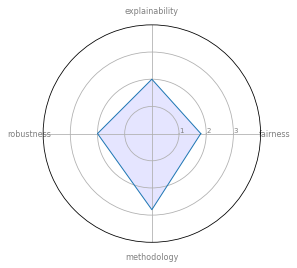

In [137]:
# visualize final score
final_score = get_final_score(config)
pillars = list(final_score.keys())
values = list(final_score.values())

draw_spyder_chart(pillars,values)
plt.show()

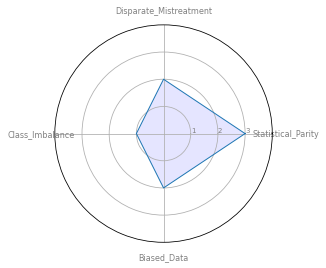

In [138]:
# visualize sub scores fairness
results = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)['fairness']
categories = list(results.keys())
values = list(results.values())

draw_spyder_chart(categories,values)

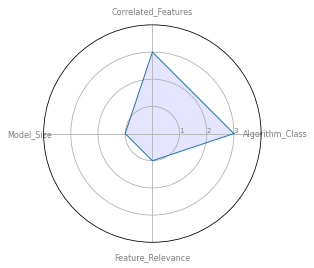

In [139]:
# visualize sub scores explainability
results = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)['explainability']
categories = list(results.keys())
values = list(results.values())

draw_spyder_chart(categories,values)

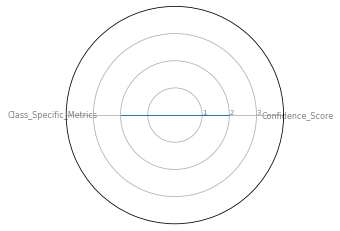

In [140]:
# visualize sub scores robustness
results = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)['robustness']
categories = list(results.keys())
values = list(results.values())

draw_spyder_chart(categories,values)

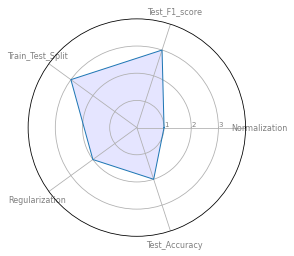

In [141]:
# visualize sub scores robustness
results = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)['methodology']
categories = list(results.keys())
values = list(results.values())

draw_spyder_chart(categories,values)